In [2]:
!pip install labelme albumentations opencv-python

In [12]:
import os
import time
import uuid # Uniform unique identifier to get profesionnal and unique img names
import cv2

IMAGES_PATH = os.path.join('data', 'images')
number_images = 30

In [4]:
cap = cv2.VideoCapture(0)
for num in range(number_images):
    print(f'Collecting image number {num}')
    ret, frame = cap.read()     # ret=read(binary) and frame=actual image
    img_name = os.path.join(IMAGES_PATH, f'{uuid.uuid1()}.jpg')     # generating name and path
    cv2.imwrite(img_name, frame)
    cv2.imshow('frame', frame)
    time.sleep(1)
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # close using 'q' or the cross
        break

cap.release()
cv2.destroyAllWindows()

In [62]:
!labelme

2024-06-12 23:47:57,962 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\adm1in\.labelmerc


In [13]:
import tensorflow as tf
import json     # labels are in json
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')       # all images paths
images.as_numpy_iterator().next()       # to check that it did pick up the images paths

In [14]:
def load_image(img_path):
    byte_img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [41]:
images = images.map(load_image)     # to apply the function (load_image) on each path of our dataset
images.as_numpy_iterator().next()       # to check that images are np arrays

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [42]:
type(images)        # check type (should be tensorflow data pipeline)

tensorflow.python.data.ops.map_op._MapDataset

In [43]:
image_generator = images.batch(4).as_numpy_iterator()       # to then visualize 4 images at a time using matplotlib

In [75]:
plot_images = image_generator.next()    # to get new images each time we rerun this cell

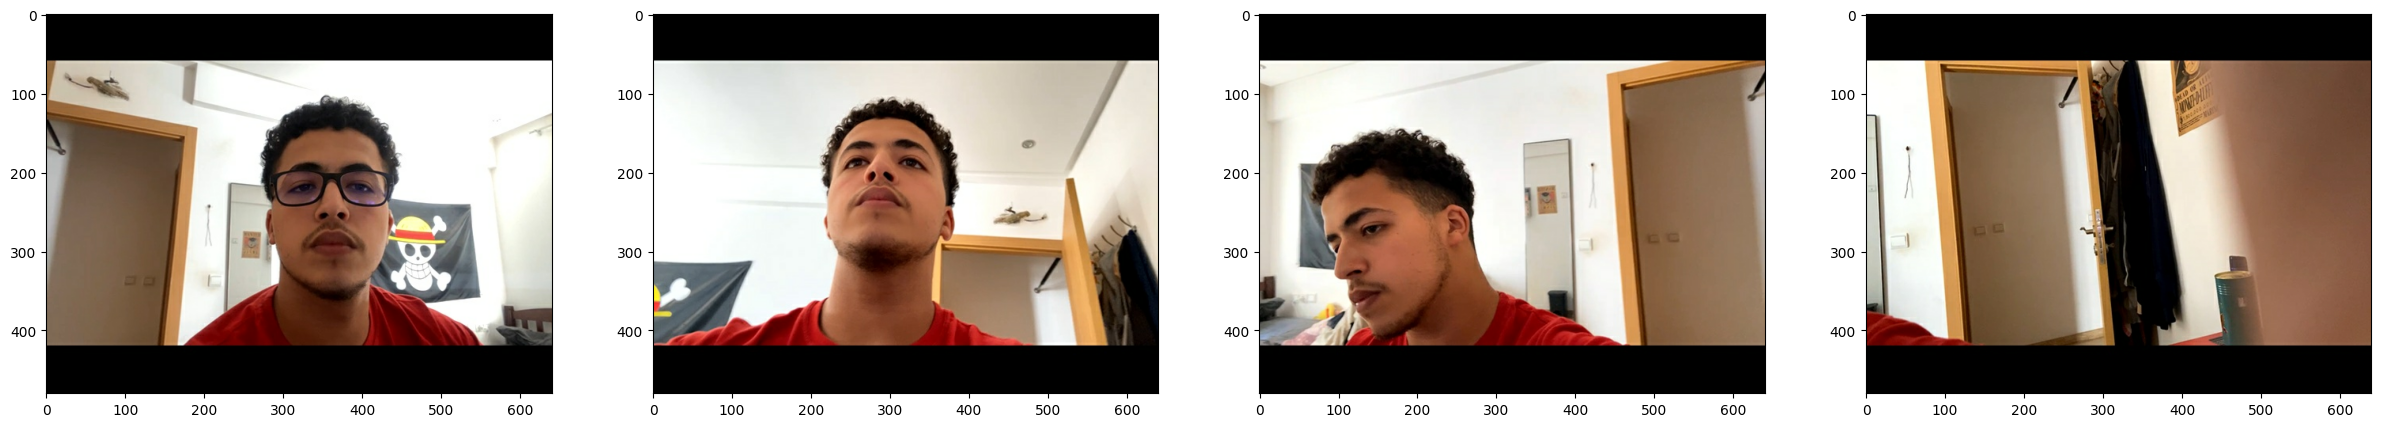

In [76]:
# visualizing our training data
fig, ax = plt.subplots(ncols=4, figsize=(30,30))
for index, image in enumerate(plot_images):
    ax[index].imshow(image)
plt.show()

In [4]:
all_images = sorted(os.listdir('data/images'))
all_labels = sorted(os.listdir('data/labels'))

In [81]:
len(all_images)

59

In [15]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

create_dir('data/train/images')
create_dir('data/train/labels')
create_dir('data/val/images')
create_dir('data/val/labels')
create_dir('data/test/images')
create_dir('data/test/labels')

In [17]:
import shutil
import random

def move_percent_files(source, destination, percentage):
    files = os.listdir(source)
    
    num_files_to_move = int(len(files) * (percentage / 100))    # from percentage to number

    files_to_move = random.sample(files, num_files_to_move)

    for file_name in files_to_move:
        shutil.move(os.path.join(source, file_name), os.path.join(destination, file_name))

    print(f"Moved {num_files_to_move} files from {source} to {destination}")

In [87]:
source = 'data/images'
destination = 'data/train/images'
percentage = 80

move_percent_files(source, destination, percentage)

Moved 47 files from data/images to data/test/images


In [88]:
destination = 'data/val/images'
percentage = 50

move_percent_files(source, destination, percentage)

Moved 9 files from data/images to data/val/images


In [89]:
destination = 'data/test/images'
percentage = 100

move_percent_files(source, destination, percentage)

Moved 3 files from data/images to data/test/images


In [93]:
for folder in ['train', 'val', 'test']:
    imgs_dir = os.path.join('data', folder, 'images')
    labels_dir = os.path.join('data', folder, 'labels')
    for file in os.listdir(imgs_dir):
        labelname = file.split('.')[0] + '.json'    # FORGOT THE DOT BEFORE JSON AND I WAS STUCK FOR HALF AN HOUR (that's why i added the prints later)
        old_labelpath = os.path.join('data', 'labels', labelname)
        if os.path.exists(old_labelpath):
            new_labelpath = os.path.join(labels_dir, labelname)
            print(f"Moving {old_labelpath} to {new_labelpath}")
            os.replace(old_labelpath, new_labelpath)
        else:
            print(f"Label file {old_labelpath} does not exist")

Moving data\labels\06d2bf3d-28cd-11ef-82d2-b8aeedbbdec1.json to data\train\labels\06d2bf3d-28cd-11ef-82d2-b8aeedbbdec1.json
Moving data\labels\076fc5c4-28cd-11ef-84bb-b8aeedbbdec1.json to data\train\labels\076fc5c4-28cd-11ef-84bb-b8aeedbbdec1.json
Moving data\labels\09413caa-28cd-11ef-bbdc-b8aeedbbdec1.json to data\train\labels\09413caa-28cd-11ef-bbdc-b8aeedbbdec1.json
Moving data\labels\09dbaaef-28cd-11ef-bf84-b8aeedbbdec1.json to data\train\labels\09dbaaef-28cd-11ef-bf84-b8aeedbbdec1.json
Moving data\labels\0b1353be-28cd-11ef-8a58-b8aeedbbdec1.json to data\train\labels\0b1353be-28cd-11ef-8a58-b8aeedbbdec1.json
Moving data\labels\0bae4628-28cd-11ef-91ae-b8aeedbbdec1.json to data\train\labels\0bae4628-28cd-11ef-91ae-b8aeedbbdec1.json
Moving data\labels\0c4b4589-28cd-11ef-9467-b8aeedbbdec1.json to data\train\labels\0c4b4589-28cd-11ef-9467-b8aeedbbdec1.json
Label file data\labels\0d8390ca-28cd-11ef-918c-b8aeedbbdec1.json does not exist
Label file data\labels\0e1f60d2-28cd-11ef-8645-b8aee

In [18]:
import albumentations as alb        # data augmentation

augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(0.2),
                         alb.VerticalFlip(p=0.5)
                         ], bbox_params = alb.BboxParams(format='albumentations',label_fields=['class_labels']))

In [4]:
test_img = cv2.imread(os.path.join('data','train','images','0b1353be-28cd-11ef-8a58-b8aeedbbdec1.jpg'))
test_img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [5]:
with open(os.path.join('data','train','labels','0b1353be-28cd-11ef-8a58-b8aeedbbdec1.json'), 'r') as f:
    test_img_label = json.load(f)
test_img_label

{'version': '5.4.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[261.05263157894734, 137.8947368421053],
    [412.6315789473684, 320.0]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\0b1353be-28cd-11ef-8a58-b8aeedbbdec1.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8R

In [6]:
test_img_label['shapes'][0]['points']

[[261.05263157894734, 137.8947368421053], [412.6315789473684, 320.0]]

In [7]:
test_coordinates = [0,0,0,0]
test_coordinates[0] = test_img_label['shapes'][0]['points'][0][0]
test_coordinates[1] = test_img_label['shapes'][0]['points'][0][1]
test_coordinates[2] = test_img_label['shapes'][0]['points'][1][0]
test_coordinates[3] = test_img_label['shapes'][0]['points'][1][1]

In [8]:
# To Normalize Bounding Boxes
# Divide the x-coordinates by the image width.
# Divide the y-coordinates by the image height.
coords = list(np.divide(test_coordinates, [640,480,640,480]))
coords

[0.4078947368421052, 0.287280701754386, 0.644736842105263, 0.6666666666666666]

In [12]:
augmented = augmentor(image=test_img, bboxes=[coords], class_labels=['face'])
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [13]:
augmented['image'].shape

(450, 450, 3)

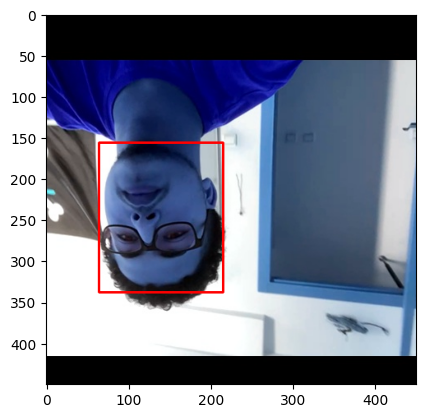

In [14]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
              (255,0,0), 2)

plt.imshow(augmented['image'])

In [8]:
create_dir('aug_data/train/images')
create_dir('aug_data/train/labels')
create_dir('aug_data/val/images')
create_dir('aug_data/val/labels')
create_dir('aug_data/test/images')
create_dir('aug_data/test/labels')

In [14]:
for partition in ['train', 'val', 'test']:
    
    path_images = os.path.join('data', partition, 'images')
    path_labels = os.path.join('data', partition, 'labels')
    
    for image in os.listdir(path_images):
        img = cv2.imread(os.path.join(path_images, image))
        coords = [0,0,0,0]
        label_path = os.path.join(path_labels, f"{image.split('.')[0]}.json")
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))
            
        try:
            for x in range(60):
                
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                aug_img_path = os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg')
                cv2.imwrite(aug_img_path, augmented['image'])
                
                annotation = {}
                annotation['image'] = image
                
                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0
                    
                aug_label_path = os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json')
                with open(aug_label_path, 'w') as f:
                    json.dump(annotation, f)
                    
        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.638157894736842, 0.3114035087719299, 0.36184210526315785, 0.7719298245614036, 'face'].
x_max is less than or equal to x_min for bbox [0.6414473684210524, 0.31359649122807026, 0.3634868421052631, 0.7565789473684211, 'face'].
x_max is less than or equal to x_min for bbox [0, 0, 0, 0, 'face'].
x_max is less than or equal to x_min for bbox [0, 0, 0, 0, 'face'].
x_max is less than or equal to x_min for bbox [0.8421052631578947, 0.3991228070175439, 0.613486842105263, 0.7982456140350878, 'face'].
x_max is less than or equal to x_min for bbox [0, 0, 0, 0, 'face'].
x_max is less than or equal to x_min for bbox [0, 0, 0, 0, 'face'].
x_max is less than or equal to x_min for bbox [0.6167763157894737, 0.3925438596491229, 0.3717105263157894, 0.8377192982456141, 'face'].
x_max is less than or equal to x_min for bbox [0.5855263157894737, 0.34429824561403516, 0.38980263157894735, 0.668859649122807, 'face'].
x_max is less than or equal to x_min for bbox [

In [16]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))           # resizing the images to 120x120
train_images = train_images.map(lambda x: x / 255)                                  # normalizing by scaling pixel values between 0 and 1

In [17]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x: x / 255)

In [18]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120, 120)))
val_images = val_images.map(lambda x: x / 255)

In [19]:
def load_label(label_path):
    with open(label_path.numpy(), 'r', encoding="utf-8") as f:
        label = json.load(f)
    
    return [label['class']], label['bbox']

In [22]:
# just to understand
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*json', shuffle=False)
train_labels.as_numpy_iterator().next()

b'aug_data\\train\\labels\\09413caa-28cd-11ef-bbdc-b8aeedbbdec1.0.json'

In [25]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_label, [x], [tf.uint8, tf.float16]))

In [26]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_label, [x], [tf.uint8, tf.float16]))

In [27]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_label, [x], [tf.uint8, tf.float16]))

In [28]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1565, 0.2131, 0.566 , 0.7373], dtype=float16))

In [29]:
len(train_images), len(train_labels)

(1440, 1440)

In [30]:
len(val_images), len(val_labels)

(180, 180)

In [32]:
len(test_images), len(test_labels)

(120, 120)

In [33]:
train = tf.data.Dataset.zip((train_images, train_labels))   # zip combines images and labels
train = train.shuffle(2000)     # shuffle needs to be bigger than the number of files
train = train.batch(8)      # batches of 8
train = train.prefetch(4)     # preloads 4 batches in the background when training

In [35]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(250)
val = val.batch(8)
val = val.prefetch(4)

In [37]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(200)
test = test.batch(8)
test = test.prefetch(4)

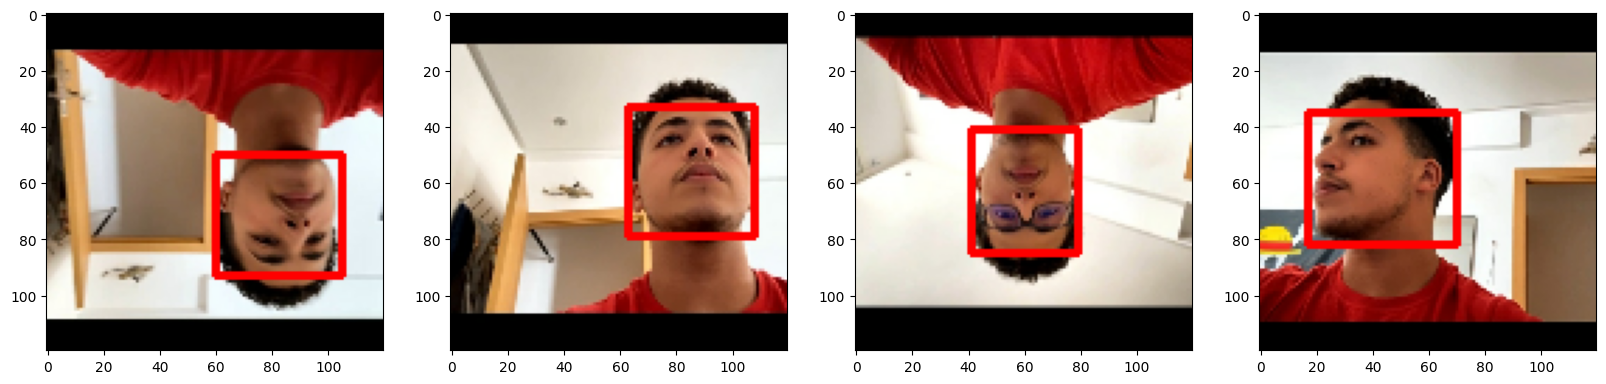

In [45]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx in range(4): 
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]
    
    # Convert sample_image to a format OpenCV understands
    sample_image_cv = cv2.UMat(sample_image)
    
    # Draw rectangle on the OpenCV object
    cv2.rectangle(sample_image_cv,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                  (255,0,0), 2)
    
    # Convert back to NumPy array for displaying with matplotlib
    sample_image_with_rect = cv2.UMat.get(sample_image_cv)
    
    ax[idx].imshow(sample_image_with_rect)

plt.show()


In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [3]:
vgg = VGG16(include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [4]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))          # 120x120 images with 3 colors
    
    vgg = VGG16(include_top=False)(input_layer)     # vgg model for object detection

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)     # classification (face or not)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1) # regression (bounding boxes)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [ ]:
face_tracor